<div style="display: flex; background-color: rgb(20, 110, 228);" >
<h1 style="margin: auto; padding: 30px; font-weight:bolder">PROJET - Logement </h1>

**Votre tâche consiste à prédire les valeurs médianes des maisons dans les quartiers californiens, compte tenu d'un certain nombre de caractéristiques de ces les quartiers. (Pour une meilleure évaluation en utilisant "Pipeline", "Evaluation Cross-validation", "Grid search" ...**

In [1]:
#Base
import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [2]:
data = pd.read_csv('Data/logement.csv')

## Nettoyage

In [4]:
data.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14111    -117.10     32.74                14.0       2361.0           601.0   
20316    -119.16     34.17                17.0       7982.0          1603.0   
15343    -117.35     33.23                 4.0       1837.0           287.0   
18736    -122.37     40.52                18.0       4547.0           774.0   
9399     -122.56     37.90                48.0       1550.0           253.0   

       population  households  median_income  median_house_value  \
14111      1831.0       526.0         1.6102             93400.0   
20316      6437.0      1596.0         4.1279            223900.0   
15343       934.0       277.0         3.8958            189800.0   
18736      2269.0       766.0         3.7896             98100.0   
9399        641.0       276.0         8.6340            463500.0   

      ocean_proximity  
14111      NEAR OCEAN  
20316      NEAR OCEAN  
15343      NEAR OCEAN  
18736          INLAND  
9399         NEAR BAY

In [85]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [86]:
data.shape

(20640, 10)

In [87]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [88]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

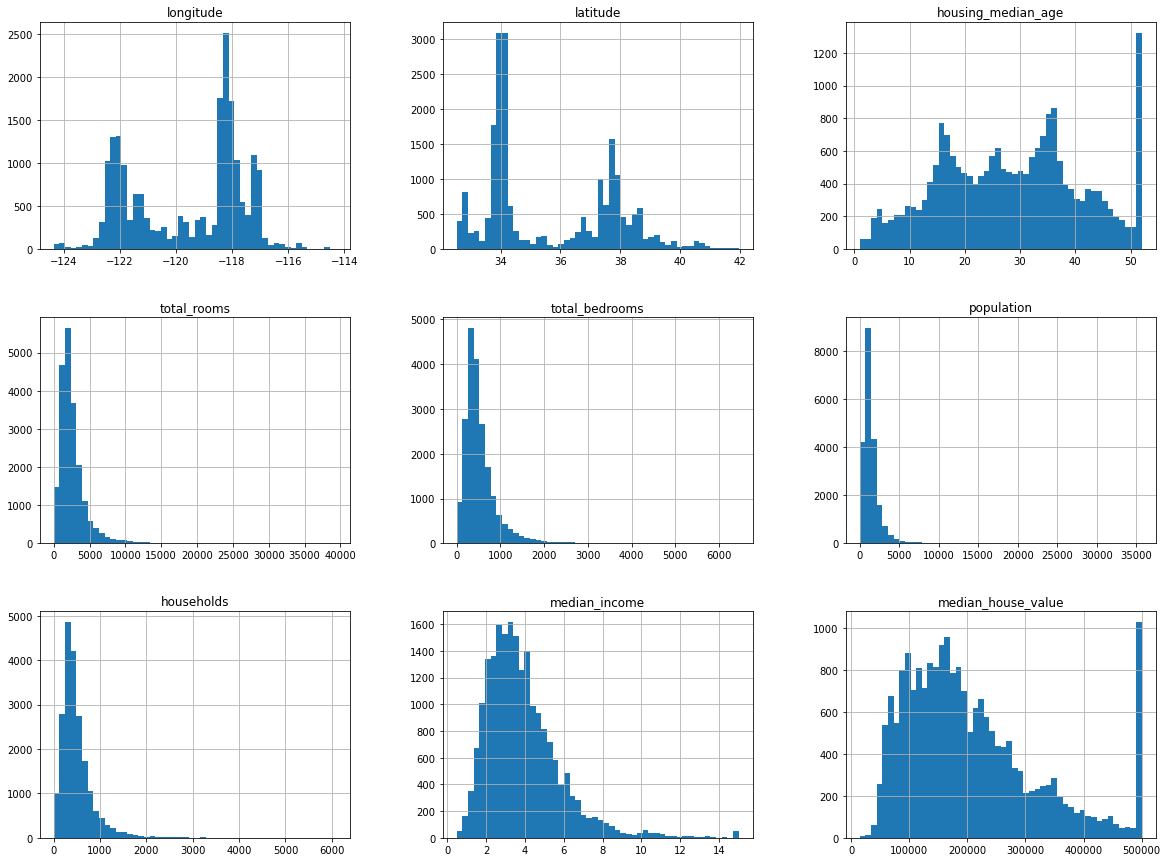

In [89]:
data.hist(figsize=(20,15), bins=50)

#### check isNA

In [90]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Option 1 : le fillna 

In [91]:
data_option1 = data.copy()

In [92]:
bedroom_mean = data_option1['total_bedrooms'].median()
data_option1['total_bedrooms'].fillna(bedroom_mean, inplace=True)

In [93]:
data_option1.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Option 2:  Simple imputer

In [94]:
data_option2 = data.copy()

In [95]:
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
total_bedrooms= np.array(data_option2["total_bedrooms"].tolist()).reshape(data_option2["total_bedrooms"].shape[0],1)
data_option2["total_bedrooms"] = imputer.fit_transform(total_bedrooms)
data_option2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [96]:
data['ocean_proximity'].nunique()

5

In [97]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#### Passage en type catégoriel de la colonne 'Ocean proximity'

In [98]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')

<Figure size 720x720 with 0 Axes>

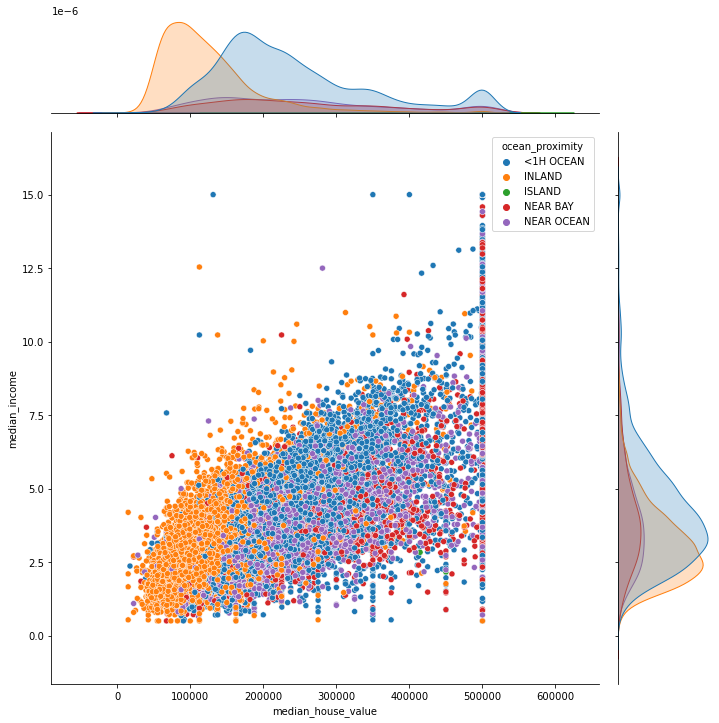

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [99]:
plt.figure(figsize=(10,10))
sns.jointplot(data=data, x="median_house_value",y="median_income", hue="ocean_proximity",height=10)
plt.ylabel("median_income")
plt.xlabel("median_house_value")
plt.show()
sns.despine

##### Option 1 

In [100]:
data_option1 = pd.get_dummies(data_option1, drop_first = True, prefix=None)
data_option1.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

#### Option 2 
OneHotEncoder qui sera implementer avec un pipeline plus tard dans le notebook

### On visualise les col de position géo

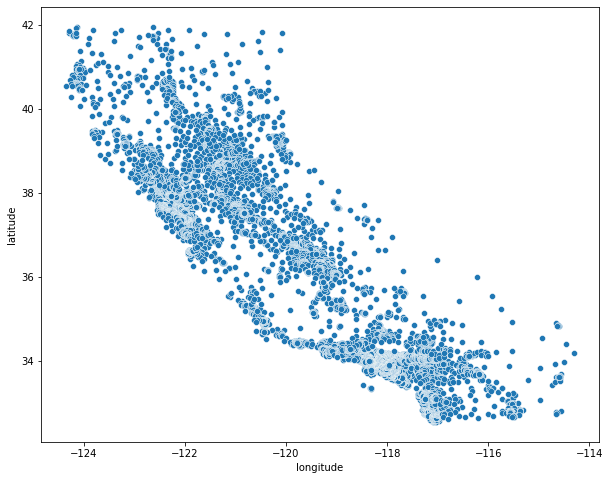

In [101]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='longitude',y='latitude')
plt.show()

In [102]:
corr_matrix = data.corr()
corr_matrix 

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

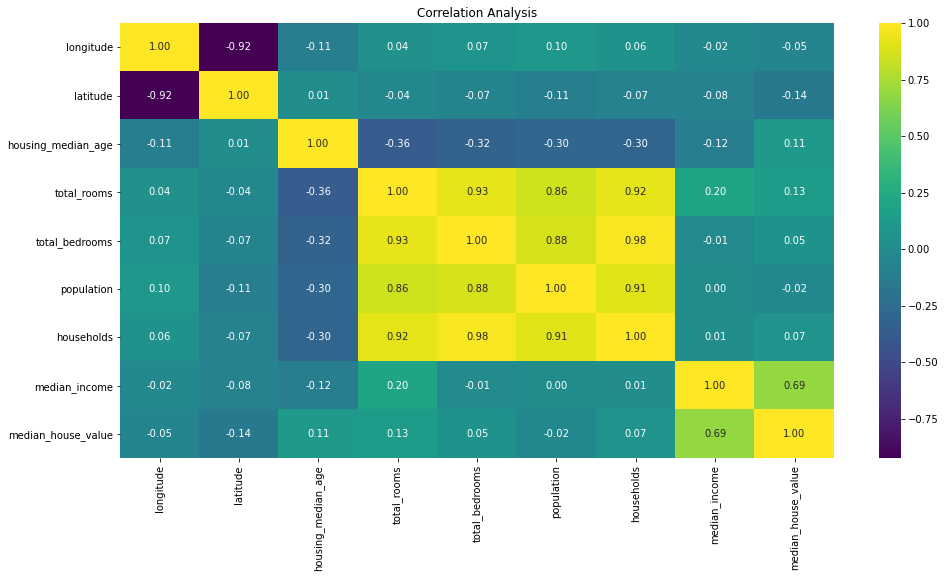

In [103]:
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title('Correlation Analysis')
plt.show()

In [104]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [105]:
data["total_rooms/household"] = data["total_rooms"]/data["households"]
data["bedrooms/total_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population/household"]=data["population"]/data["households"]

In [106]:
corr_matrix_2 = data.corr()
corr_matrix_2

longitude  latitude  housing_median_age  total_rooms  \
longitude               1.000000 -0.924664           -0.108197     0.044568   
latitude               -0.924664  1.000000            0.011173    -0.036100   
housing_median_age     -0.108197  0.011173            1.000000    -0.361262   
total_rooms             0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms          0.069608 -0.066983           -0.320451     0.930380   
population              0.099773 -0.108785           -0.296244     0.857126   
households              0.055310 -0.071035           -0.302916     0.918484   
median_income          -0.015176 -0.079809           -0.119034     0.198050   
median_house_value     -0.045967 -0.144160            0.105623     0.134153   
total_rooms/household  -0.027540  0.106389           -0.153277     0.133798   
bedrooms/total_room     0.092657 -0.113815            0.136089    -0.187900   
population/household    0.002476  0.002366            0.013191    -0.024581   

                       total_bedrooms  population  households  median_income  \
longitude                    0.069608    0.099773    0.055310      -0.015176   
latitude                    -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age          -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms                  0.930380    0.857126    0.918484       0.198050   
total_bedrooms               1.000000    0.877747    0.979728      -0.007723   
population                   0.877747    1.000000    0.907222       0.004834   
households                   0.979728    0.907222    1.000000       0.013033   
median_income               -0.007723    0.004834    0.013033       1.000000   
median_house_value           0.049686   -0.024650    0.065843       0.688075   
total_rooms/household        0.001538   -0.072213   -0.080598       0.326895   
bedrooms/total_room          0.084238    0.035319    0.065087      -0.615661   
population/household        -0.028355    0.069863   -0.027309       0.018766   

                       median_house_value  total_rooms/household  \
longitude                       -0.045967              -0.027540   
latitude                        -0.144160               0.106389   
housing_median_age               0.105623              -0.153277   
total_rooms                      0.134153               0.133798   
total_bedrooms                   0.049686               0.001538   
population                      -0.024650              -0.072213   
households                       0.065843              -0.080598   
median_income                    0.688075               0.326895   
median_house_value               1.000000               0.151948   
total_rooms/household            0.151948               1.000000   
bedrooms/total_room             -0.255880              -0.416952   
population/household            -0.023737              -0.004852   

                       bedrooms/total_room  population/household  
longitude                         0.092657              0.002476  
latitude                         -0.113815              0.002366  
housing_median_age                0.136089              0.013191  
total_rooms                      -0.187900             -0.024581  
total_bedrooms                    0.084238             -0.028355  
population                        0.035319              0.069863  
households                        0.065087             -0.027309  
median_income                    -0.615661              0.018766  
median_house_value               -0.255880             -0.023737  
total_rooms/household            -0.416952             -0.004852  
bedrooms/total_room               1.000000              0.002938  
population/household              0.002938              1.000000

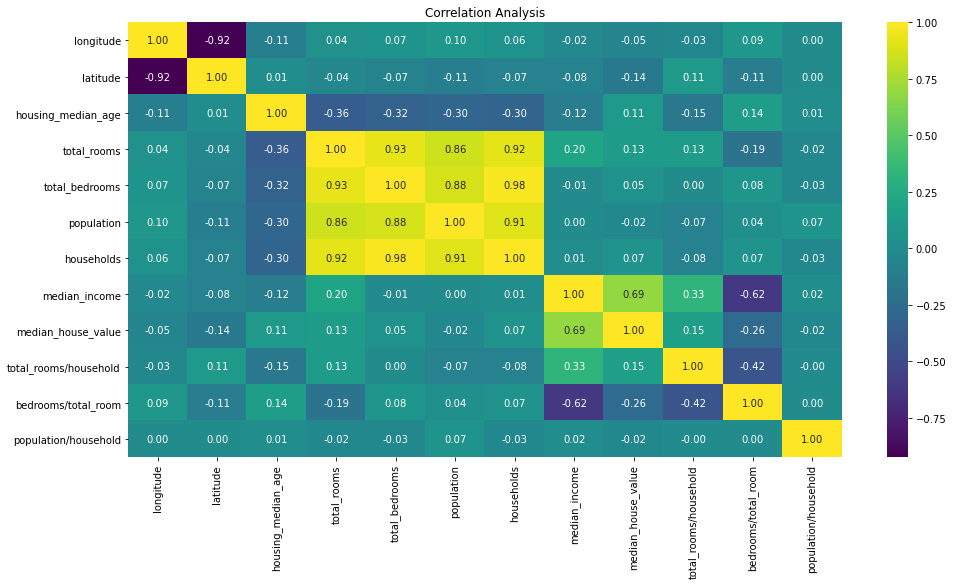

In [107]:
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix_2,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.title('Correlation Analysis')
plt.show()

In [108]:
corr_matrix_2["median_house_value"].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.688075
total_rooms/household    0.151948
total_rooms              0.134153
housing_median_age       0.105623
households               0.065843
total_bedrooms           0.049686
population/household    -0.023737
population              -0.024650
longitude               -0.045967
latitude                -0.144160
bedrooms/total_room     -0.255880
Name: median_house_value, dtype: float64

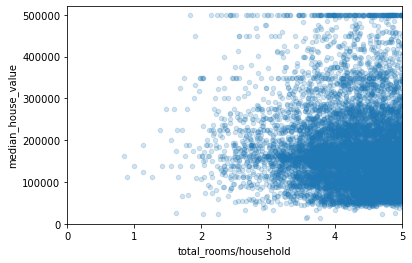

In [109]:
data.plot(kind="scatter", x="total_rooms/household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

#### Outliers

In [110]:
data[data['median_house_value'] > 500000]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
459      -122.25     37.87                52.0        609.0           236.0   
493      -122.24     37.86                52.0       1668.0           225.0   
494      -122.24     37.85                52.0       3726.0           474.0   
509      -122.23     37.83                52.0       2990.0           379.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  median_house_value  \
89          396.0        85.0         1.2434            500001.0   
459        1349.0       250.0         1.1696            500001.0   
493         517.0       214.0         7.8521            500001.0   
494        1366.0       496.0         9.3959            500001.0   
509         947.0       361.0         7.8772            500001.0   
...           ...         ...            ...                 ...   
20422       576.0       216.0         5.1457            500001.0   
20426       415.0       119.0        10.0472            500001.0   
20427      5495.0      2152.0         8.6499            500001.0   
20436      1179.0       371.0        12.5420            500001.0   
20443       130.0        35.0         3.3438            500001.0   

      ocean_proximity  total_rooms/household  bedrooms/total_room  \
89           NEAR BAY               2.929412             0.313253   
459          NEAR BAY               2.436000             0.387521   
493          NEAR BAY               7.794393             0.134892   
494          NEAR BAY               7.512097             0.127214   
509          NEAR BAY               8.282548             0.126756   
...               ...                    ...                  ...   
20422       <1H OCEAN               6.958333             0.174983   
20426       <1H OCEAN               9.890756             0.117247   
20427       <1H OCEAN               7.236059             0.142692   
20436       <1H OCEAN               9.873315             0.111657   
20443       <1H OCEAN               5.342857             0.176471   

       population/household  
89                 4.658824  
459                5.396000  
493                2.415888  
494                2.754032  
509                2.623269  
...                     ...  
20422              2.666667  
20426              3.487395  
20427              2.553439  
20436              3.177898  
20443              3.714286  

[965 rows x 13 columns]

#### On peut noter que la col median house value est plafonné a 500000 et que toute valeur sup peut etre considérer comme outliers

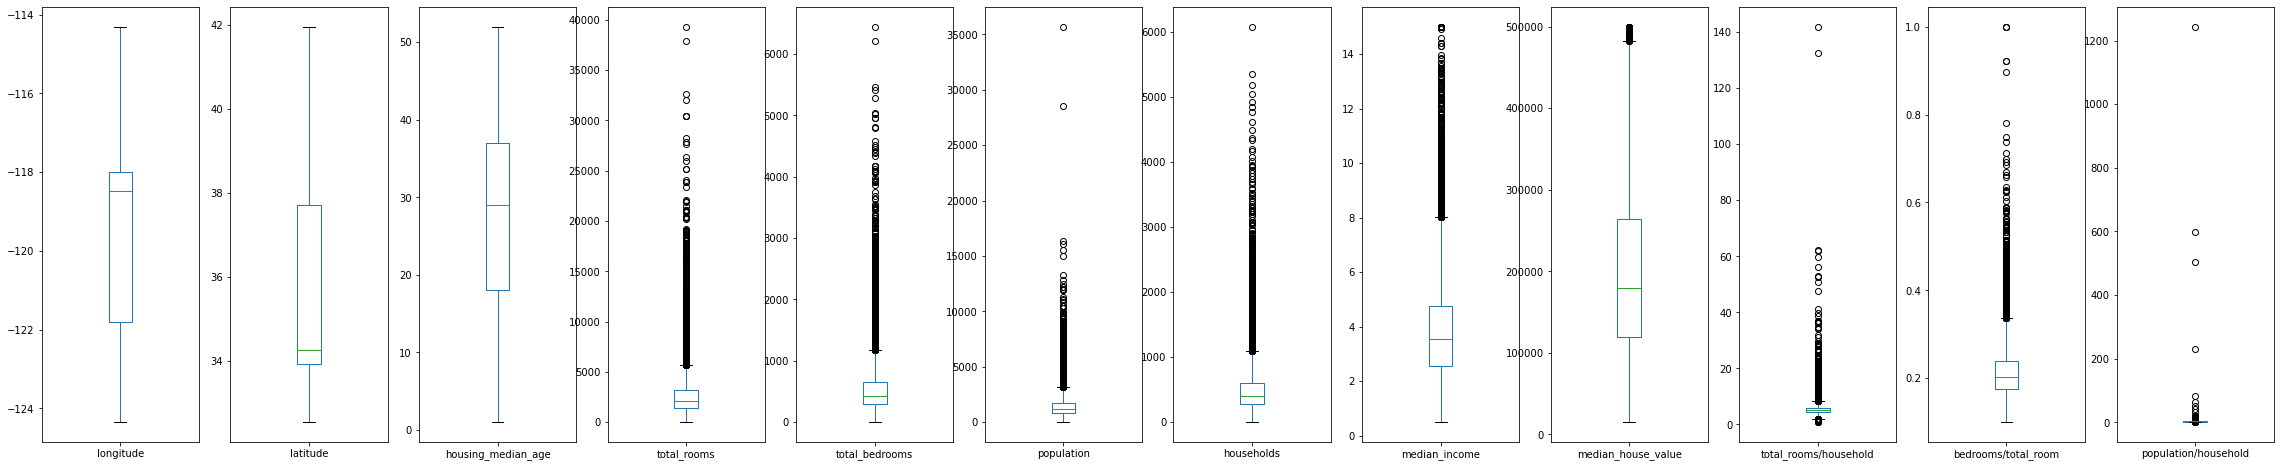

In [111]:
data.plot(kind = "box" , subplots = True , figsize = (40,8) )
plt.show()

In [112]:
df= data.copy()

In [122]:
feature=['total_rooms', 'total_bedrooms', 'population', 'households','median_income','population/household']

In [136]:
def outliers_aberrante(df, col):
    return df[(df[col]> 0 )]

In [137]:
for col in feature:
    df= outliers_aberrante(df, col)

In [138]:
i = 0 #counter
for cols in feature:
    # Removing Outliers 
    Q3 = df[cols].quantile(0.99)
    df = df[df[cols] <= Q3]
    Q1 = df[cols].quantile(0.01)
    df = df[df[cols] >= Q1 ]          
    print(cols)
    print("Q1:-",Q1)
    print("Q3:-",Q3)
    i=i+1

total_rooms
Q1:- 1534.8
Q3:- 2680.739999999999
total_bedrooms
Q1:- 335.16
Q3:- 476.9
population
Q1:- 893.79
Q3:- 1233.1799999999998
households
Q1:- 343.88
Q3:- 424.0
median_income
Q1:- 2.668596
Q3:- 4.922189
population/household
Q1:- 2.5177582373155447
Q3:- 3.0233930600649352


In [139]:
df.describe()

longitude    latitude  housing_median_age  total_rooms  \
count  464.000000  464.000000          464.000000   464.000000   
mean  -119.863707   35.937306           32.144397  2079.028017   
std      2.018225    2.203398           12.048796   246.921200   
min   -124.170000   32.580000            5.000000  1560.000000   
25%   -122.022500   33.985000           23.000000  1886.500000   
50%   -119.325000   35.085000           34.000000  2083.000000   
75%   -118.120000   37.780000           41.000000  2261.250000   
max   -116.830000   40.810000           52.000000  2655.000000   

       total_bedrooms   population  households  median_income  \
count      464.000000   464.000000  464.000000     464.000000   
mean       399.040948  1058.157328  383.939655       3.812186   
std         31.695849    78.544694   21.706978       0.605382   
min        339.000000   894.000000  344.000000       2.672600   
25%        373.750000   995.000000  365.000000       3.323525   
50%        397.000000  1053.500000  382.000000       3.809900   
75%        423.000000  1118.000000  403.000000       4.290275   
max        476.000000  1233.000000  424.000000       4.921900   

       median_house_value  total_rooms/household  bedrooms/total_room  \
count          464.000000             464.000000           464.000000   
mean        195801.084052               5.422277             0.194068   
std          81130.496894               0.633987             0.023438   
min          59600.000000               3.795620             0.141275   
25%         137500.000000               4.979812             0.178411   
50%         186900.000000               5.425305             0.191832   
75%         236625.000000               5.866354             0.206780   
max         500001.000000               7.317680             0.279487   

       population/household  
count            464.000000  
mean               2.756243  
std                0.137073  
min                2.518041  
25%                2.642155  
50%                2.750350  
75%                2.865262  
max                3.023377

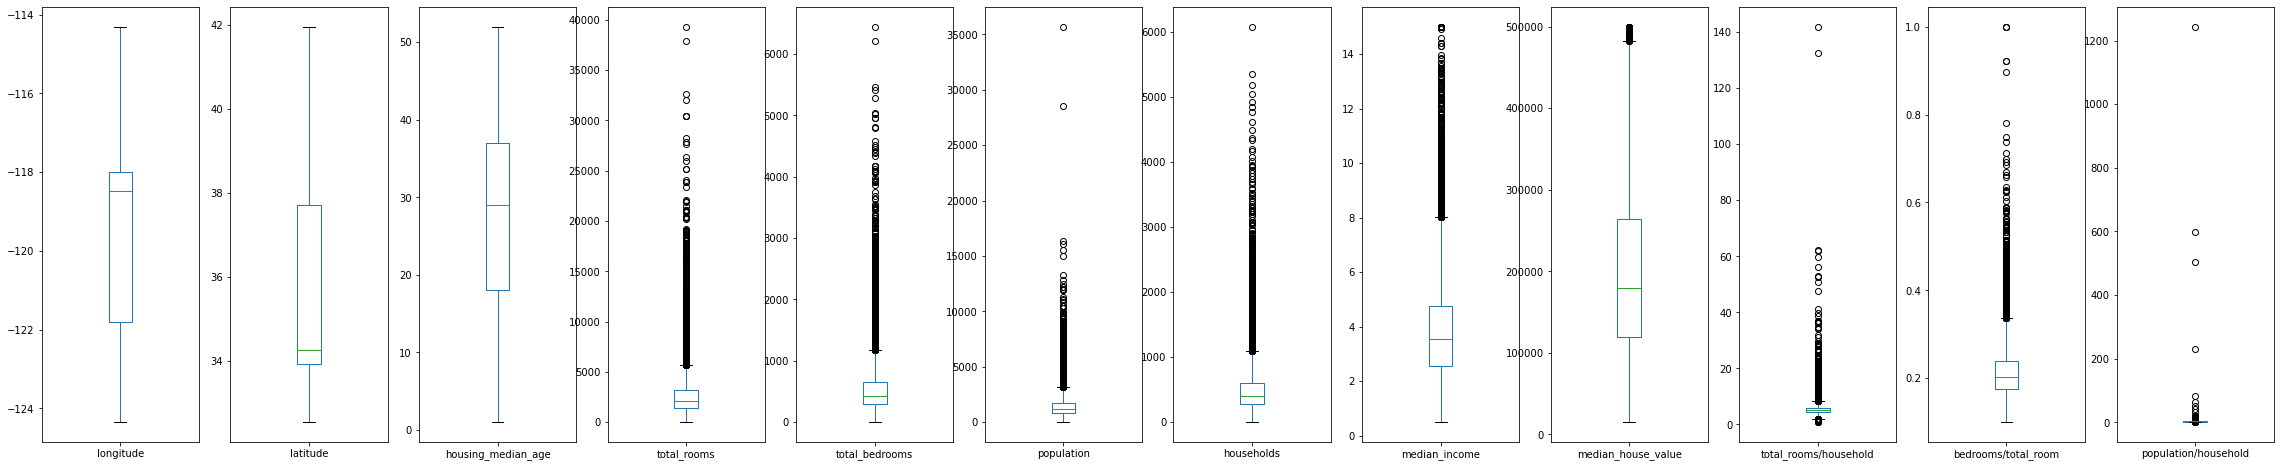

In [134]:
data.plot(kind = "box" , subplots = True , figsize = (40,8) )
plt.show()

In [119]:
data.to_csv('Data/ml_logement.csv', sep=',')

<p>La partie préprocessing et machine learning à suivre sur le notebook ML_logement</p> 